<a href="https://colab.research.google.com/github/Nishchal-ll/Machine-Learning/blob/main/dataclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


5.196152422706632


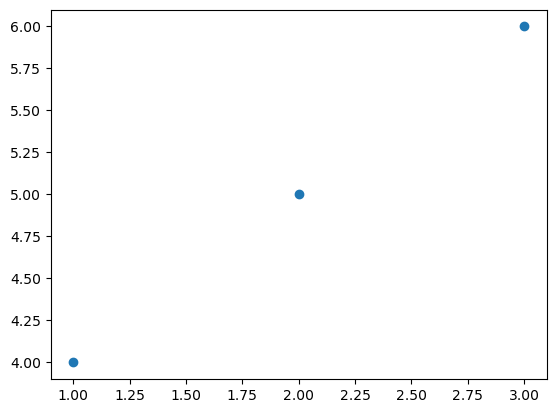

In [2]:
a=[1,2,3]
b=[4,5,6]
c=b[0]-a[0]
d=b[1]-a[1]
e=b[2]-a[2]
f=c*c
g=d*d
h=e*e
print(math.sqrt(f+g+h))
plt.scatter(a,b)

In [ ]:
a=np.array((1,2,3))
b=np.array((4,5,6))
dist=np.linalg.norm(a-b)
print(dist)

5.196152422706632


In [ ]:
a=[[1,2,3],[4,5,6],[7,8,9]]
b=[[11,12,13],[14,15,16],[17,18,19]]
ans=np.dot(a,b)
ans


array([[ 90,  96, 102],
       [216, 231, 246],
       [342, 366, 390]])

In [ ]:
a = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
b = [[11, 12, 13], [14, 15, 16], [17, 18, 19]]

result = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

for i in range(len(a)):
    for j in range(len(b[0])):
        for k in range(len(b)):
            result[i][j] += a[i][k] * b[k][j]
print(result)


[[90, 96, 102], [216, 231, 246], [342, 366, 390]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


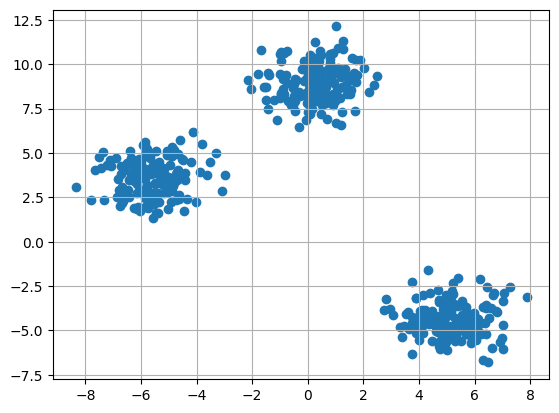

In [8]:
x,y=make_blobs(n_samples=500, n_features=2,centers=3,random_state=23)
fig=plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()


In [15]:
k=3
clusters={}
np.random.seed(13)

for idx in range(k):
  center=2*(2*np.random.random((x.shape[1],))-1)
  points=[]
  cluster={
      'center':center,
      'points':[]
  }
  clusters[idx]=cluster

clusters

{0: {'center': array([ 1.11080964, -1.04983512]), 'points': []},
 1: {'center': array([1.29711413, 1.86299679]), 'points': []},
 2: {'center': array([ 1.89040446, -0.18620301]), 'points': []}}

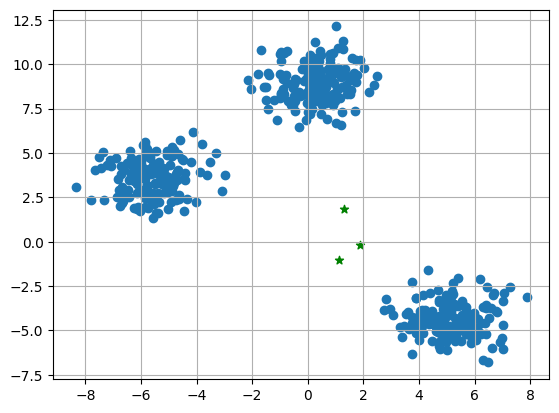

In [19]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
  center=clusters[i]['center']
  plt.scatter(center[0],center[1],marker='*',c='green')
plt.show()

In [20]:
##this plot displays a scatter plot of data points (X[:,0],X[:,1]) with grid lines. it walso marks the initial cluster centers(red stars) generated for k means cluistering.

def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [28]:
# create a function to assign and update the cluster center
## this steps assigns data piunt s to the nearest cluster center , and the m step updates cluster centers based on the mean of assigned points in k means clustering

def assign_clusters(x,clusters):
  for idx in range(x.shape[0]):
    dist=[]
    curr_x=x[idx]

    for i in range(k):
      dis=distance(curr_x,clusters[i]['center'])
      dist.append(dis)
      curr_cluster=np.argmin(dist)
      clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(x,clusters):
    for i in range(k):
      points=np.array(clusters[i]['points'])
      if points.shape[0]>0:
        new_center=points.mean(axis=0)
        clusters[i]['center']=new_center

        clusters[i]['points']=[]
    return clusters

In [29]:
## create the function to predict the cluster for the datapoints
def pred_cluster(x,clusters):
  pred=[]
  for i in range(x.shape[0]):
    dist=[]
    for j in range(k):
      dist.append(distance(x[i],clusters[j]['center']))
      pred.append(np.argmin(dist))
    return pred


In [30]:
## assign update and predict the cluster center
clusters=assign_clusters(x,clusters)
clusters=update_clusters(x,clusters)
pred=pred_cluster(x,clusters)

<ipython-input-31-5c5952e85627>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[:,0],x[:,1],c = pred)


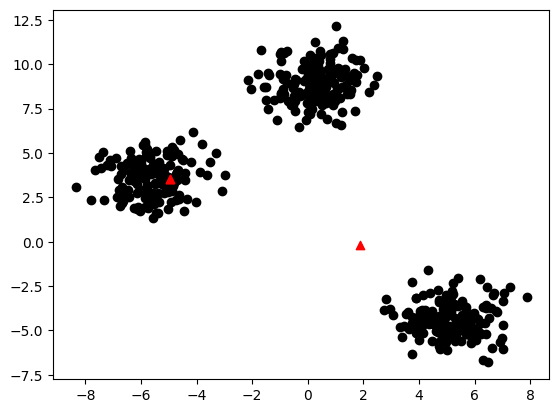

In [31]:
## plot the data points with their predicted cluster center

plt.scatter(x[:,0],x[:,1],c = pred)
for i in clusters:
  center=clusters[i]['center']
  plt.scatter(center[0],center[1],marker='^',c='red')
plt.show()